In [4]:
import torch
import nets
import sumoenv
### [markdown]
# 训练
actor_lr = 1e-4
critic_lr = 1e-3
num_episodes = 30
hidden_dim = 8
gamma = 0.98
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

env = sumoenv.SumoEnv()
buff = nets.ReplayBuffer(512)
torch.manual_seed(0)
state_dim = 4 * 4 + 3
action_dim = 4
agent = nets.ActorCritic(state_dim, hidden_dim, action_dim, actor_lr, critic_lr,
                    gamma, device)

return_list = nets.train_off_policy_agent(env, agent, num_episodes,buff,128,32)
print(return_list)
# return_list = nets.train_on_policy_agent(env,agent,num_episodes)

Iteration 0:   0%|          | 0/3 [00:00<?, ?it/s]e:\Lenovo\Desktop\2\nets.py:247: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():
Iteration 3:   0%|          | 0/3 [00:00<?, ?it/s]

 Retrying in 1 seconds


Iteration 4:  67%|██████▋   | 2/3 [02:47<01:23, 83.61s/it]

 Retrying in 1 seconds


Iteration 9: 100%|██████████| 3/3 [04:32<00:00, 90.73s/it]

[-366.7655814732532, 76.77356449887365, 232.82633382525708, 236.18834192821063, 269.1908537036848, 156.1742736752441, 145.93168014859248, 199.32040281297557, 224.47974137589094, 232.13572053593597, 256.96097500935326, 213.593986820584, 255.97684730664716, 292.03317365147245, 297.66295790299233, 290.7364813234219, 289.864379441585, 301.0513629316173, 303.17707838234975, 309.2304920176819, 310.5019977172986, 317.9361483394063, 313.49114226874275, 318.77452821687467, 312.7180041383046, 317.0949582963509, 320.3327389475972, 318.6922612873442, 320.2811961929169, 330.70292802860104]


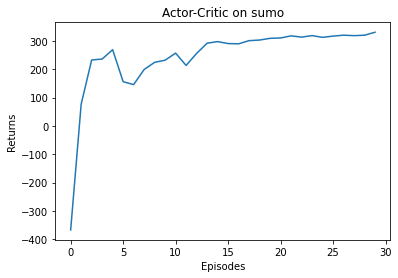

In [5]:
import matplotlib.pyplot as plt
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'Actor-Critic on sumo')
plt.show()